<a href="https://colab.research.google.com/github/harkpun/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> What is Cardiovascular disease? <b>

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots. It can also be associated with damage to arteries in organs such as the brain, heart, kidneys and eyes.

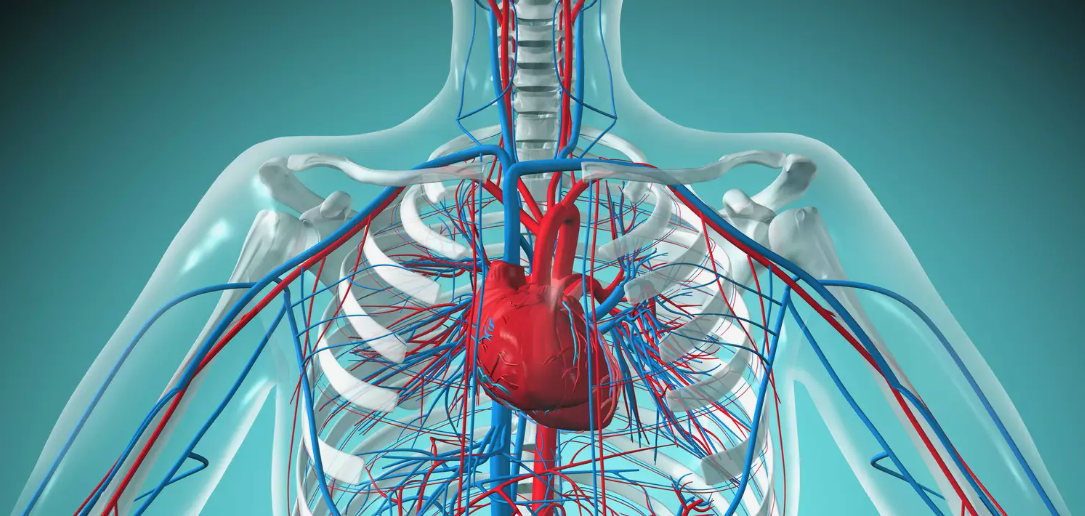


## **Data Description**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

##### **Each attribute is a potential risk factor. These attributes are demographic, behavioral and medical risk factors.**

**Attribute Informations-**

Demographic
* ***Sex***: male or female("M" or "F")
* ***Age***: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
* ***is_smoking***: whether or not the patient is a current smoker ("YES" or "NO")
* ***Cigs Per Day***: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
* ***BP Meds***: whether or not the patient was on blood pressure medication (Nominal)
* ***Prevalent Stroke***: whether or not the patient had previously had a stroke (Nominal)
* ***Prevalent Hyp***: whether or not the patient was hypertensive (Nominal)
* ***Diabetes***: whether or not the patient had diabetes (Nominal)

Medical(current)
* ***Tot Chol***: total cholesterol level (Continuous)
* ***Sys BP***: systolic blood pressure (Continuous)
* ***Dia BP***: diastolic blood pressure (Continuous)
* ***BMI***: Body Mass Index (Continuous)
* ***Heart Rate***: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* ***Glucose***: glucose level (Continuous)

Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [261]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Classification/data_cardiovascular_risk.csv', index_col='id')

In [262]:
df = data.copy()

In [263]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [264]:
df.shape

(3390, 16)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [266]:
df.duplicated().sum()

0

In [267]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


In [268]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **EDA**

In [269]:
for col in df.columns:
  print(f'number of unique column in {col} is {df[col].nunique()}')
  print(f'{col} is {df[col].unique()}')
  print('='*50)

number of unique column in age is 39
age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
number of unique column in education is 4
education is [ 2.  4.  1.  3. nan]
number of unique column in sex is 2
sex is ['F' 'M']
number of unique column in is_smoking is 2
is_smoking is ['YES' 'NO']
number of unique column in cigsPerDay is 32
cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
number of unique column in BPMeds is 2
BPMeds is [ 0. nan  1.]
number of unique column in prevalentStroke is 2
prevalentStroke is [0 1]
number of unique column in prevalentHyp is 2
prevalentHyp is [0 1]
number of unique column in diabetes is 2
diabetes is [0 1]
number of unique column in totChol is 240
totChol is [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 2

### **Dealing with Null data**

In [270]:
print(f'Missing Data Count \n{df.isna().sum()[df.isna().sum()>0]}')
print('='*50)
print(f'Missing Data %  \n{df.isna().sum()[df.isna().sum()>0] / len(df)*100}')

Missing Data Count 
education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64
Missing Data %  
education     2.566372
cigsPerDay    0.648968
BPMeds        1.297935
totChol       1.120944
BMI           0.412979
heartRate     0.029499
glucose       8.967552
dtype: float64


**Missing data imputation**

* In dataset if feature has more than 10 unique values considered as Numerical features and those are filling with their Median value. 

* Remaining are considered as Categorical features and those are filling with their Mode value.

In [271]:
# imputing missing  values
for col in df.columns:
  
  if df[col].nunique() > 10:
    df[col] = df[col].fillna(df[col].median())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

In [272]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **Checking data is Balanced or Imbalanced.**

In [273]:
# percentage distibution in target column
df['TenYearCHD'].value_counts()/len(df)*100

0    84.926254
1    15.073746
Name: TenYearCHD, dtype: float64

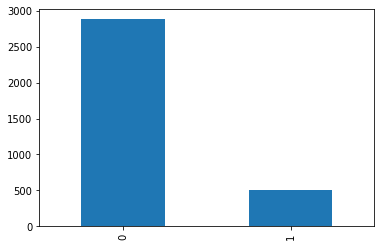

In [274]:
df['TenYearCHD'].value_counts().plot(kind='bar')

**Data is Imbalanced**

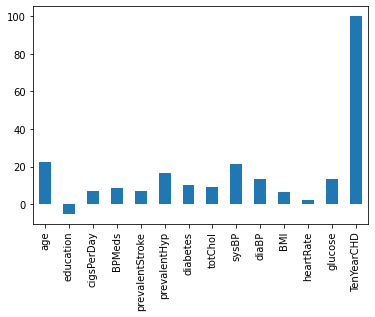

In [275]:
(df.corrwith(df['TenYearCHD'])*100).plot(kind='bar')

In [276]:
df.groupby('TenYearCHD').mean()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,
0,48.728031,1.968044,8.670719,0.023272,0.004168,0.282737,0.018757,235.265717,130.603856,82.194338,25.678836,75.875304,80.417853
1,54.129159,1.821918,10.925636,0.064579,0.019569,0.499022,0.064579,247.035225,143.854207,86.763209,26.437867,76.549902,89.056751


In [277]:
df.groupby('TenYearCHD').median()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,
0,48.0,2.0,0.0,0.0,0.0,0.0,0.0,233.0,127.0,81.0,25.25,75.0,78.0
1,55.0,1.0,3.0,0.0,0.0,0.0,0.0,241.0,139.0,85.0,26.09,75.0,78.0


### **Numeric and Category features**

In [278]:
numeric_features = []
category_features = []

for col in df.columns:
  
  if df[col].nunique() > 5:
    numeric_features.append(col)
  else:
    category_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {category_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


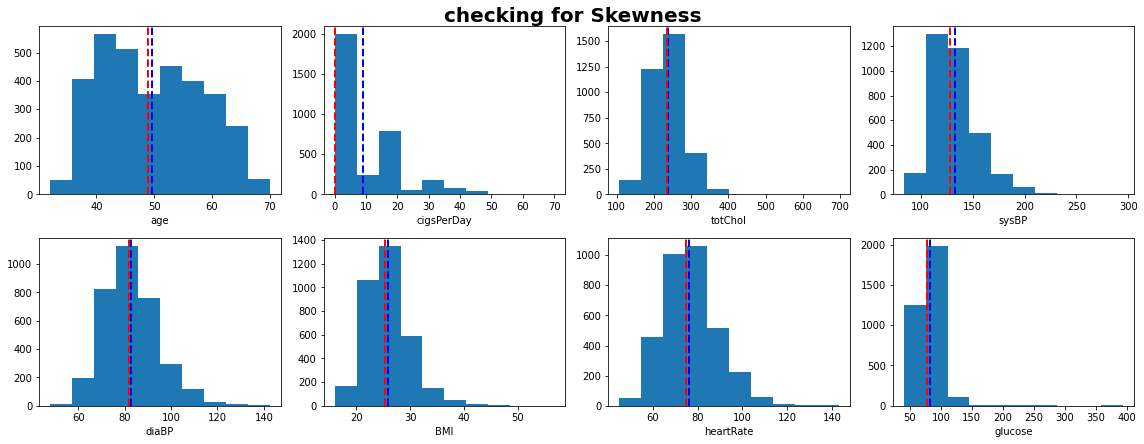

In [279]:
plt.figure(figsize=(16,6))
plt.suptitle('checking for Skewness', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2,4, i+1)
  plt.hist(df[col])
  plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.xlabel(col) 
  plt.tight_layout()

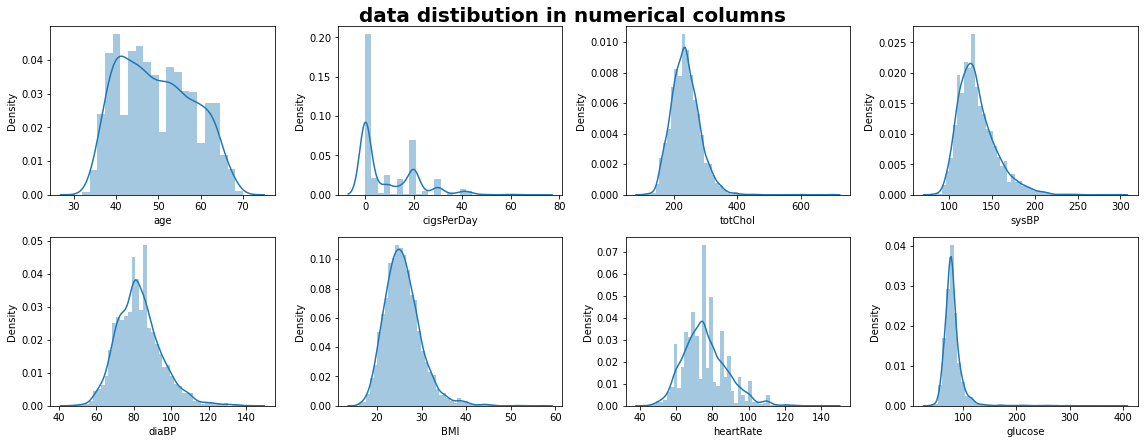

In [280]:
plt.figure(figsize=(16,6))
plt.suptitle('data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.distplot(df[col])  
  plt.xlabel(col)
  plt.tight_layout()

### **Outlier Analysis**

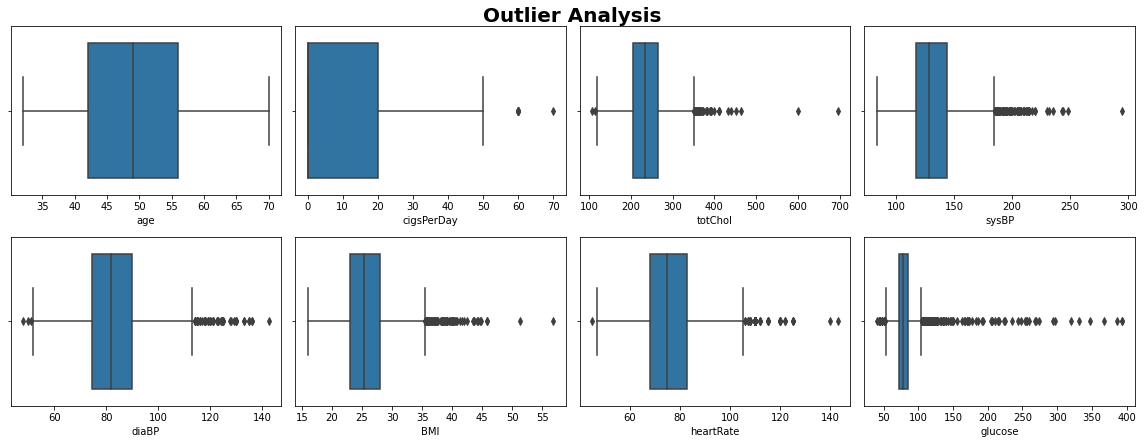

In [281]:
plt.figure(figsize=(16,6))
plt.suptitle('Outlier Analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()

In [282]:

df1 = df.copy()

for col in numeric_features:
  
  #usning IQR method to defined range of upper and lower limit.
  IQR = df1[col].quantile(0.75) - df1[col].quantile(0.25)
  upper_limit = df1[col].quantile(0.75) + (1.5 * IQR)
  lower_limit = df1[col].quantile(0.25) - (1.5 * IQR)

  # replcing with upper_limit, if outlier is higher than upper_limit.
  df1[col] = np.where(df1[col]>upper_limit, upper_limit, df1[col])
  
  # replcing with lower_limit, if outlier is lesser than lower_limit.
  df1[col] = np.where(df1[col]<lower_limit, lower_limit, df1[col])


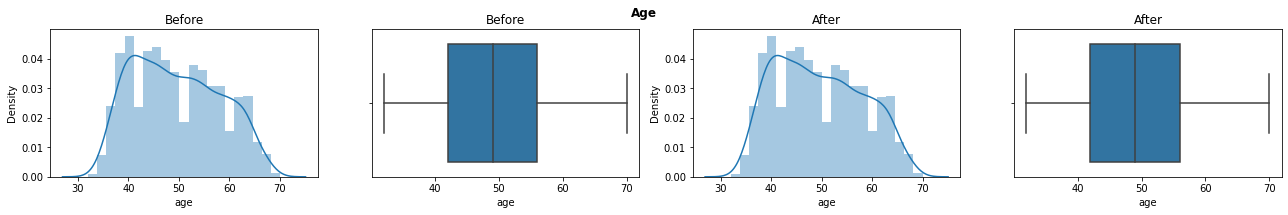

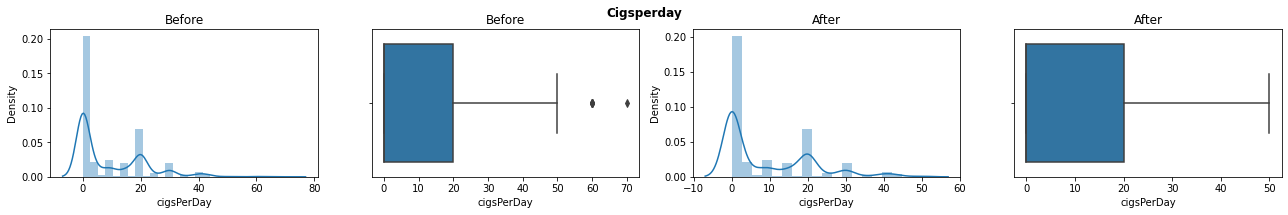

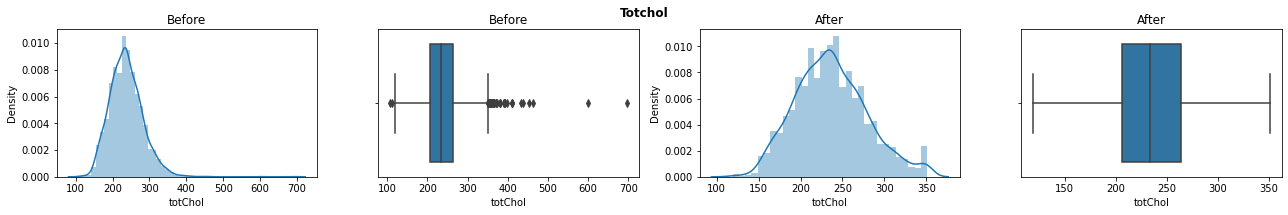

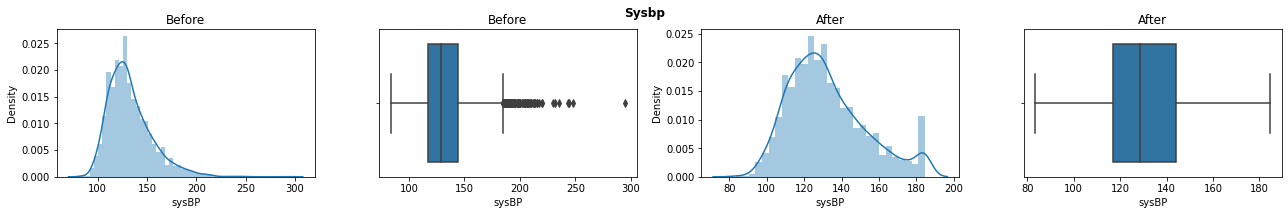

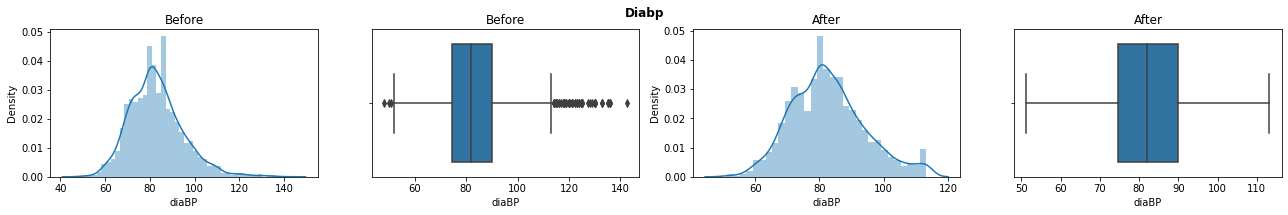

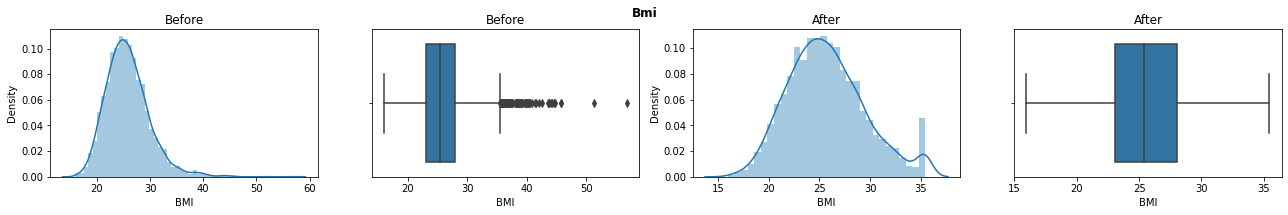

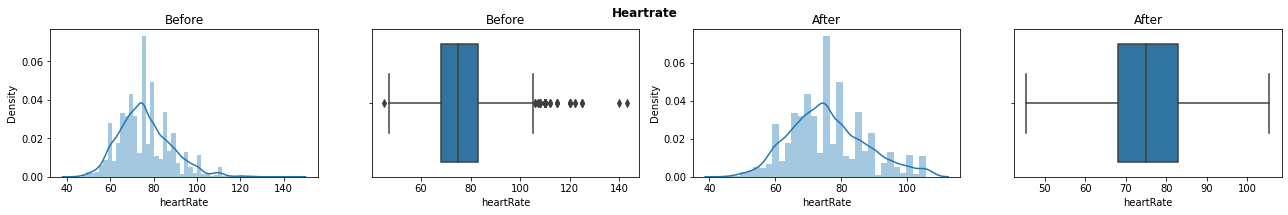

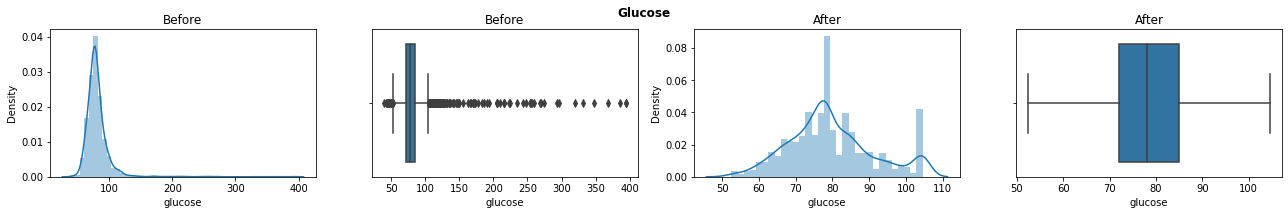

In [283]:
for col in numeric_features:
  fig, ax =plt.subplots(1,4, figsize=(18,3))
  
  # Before treating outliers 
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  
  # After treating outliers
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

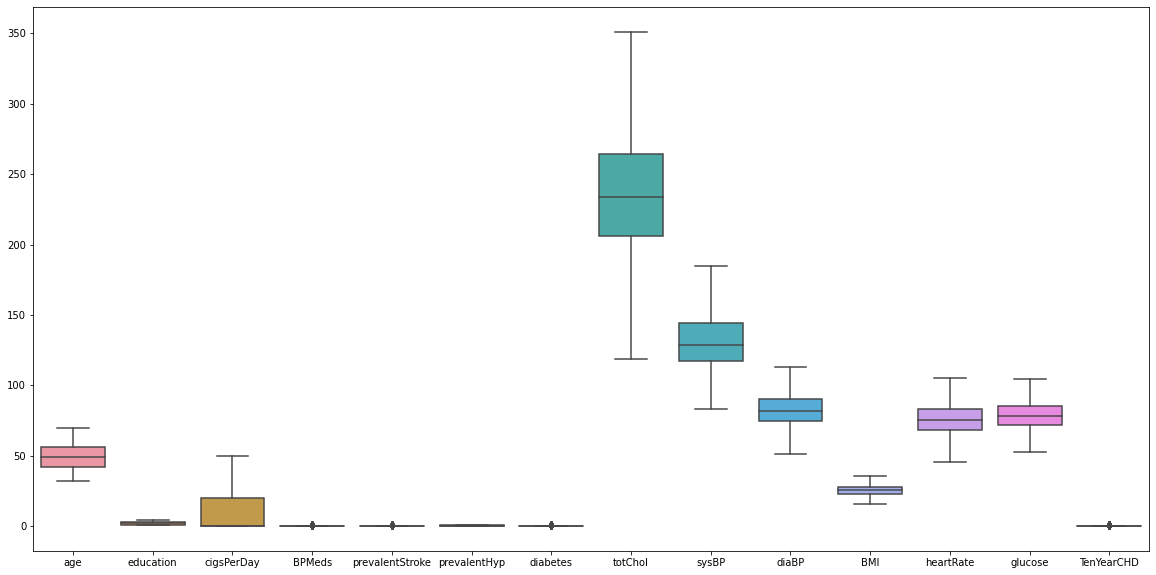

In [284]:
#Having a look at the box plot in order to look for the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df1)
plt.show()

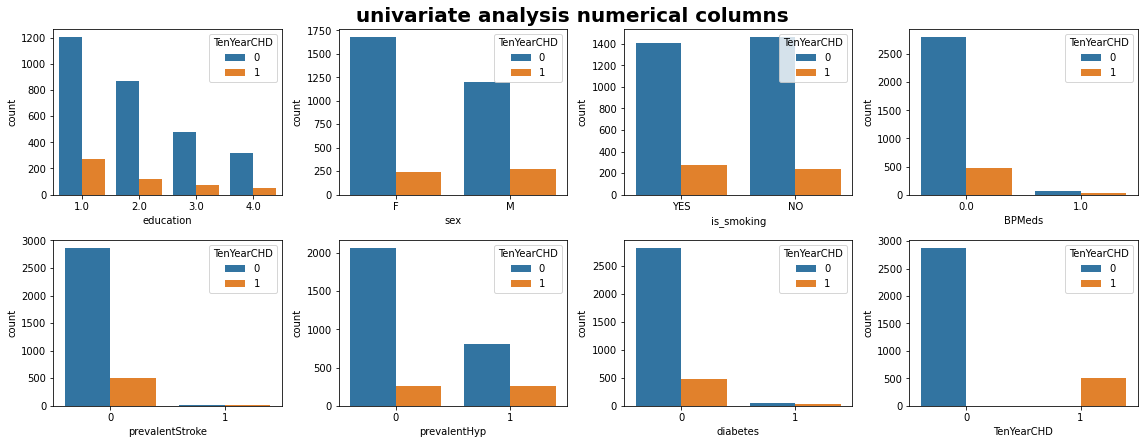

In [285]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

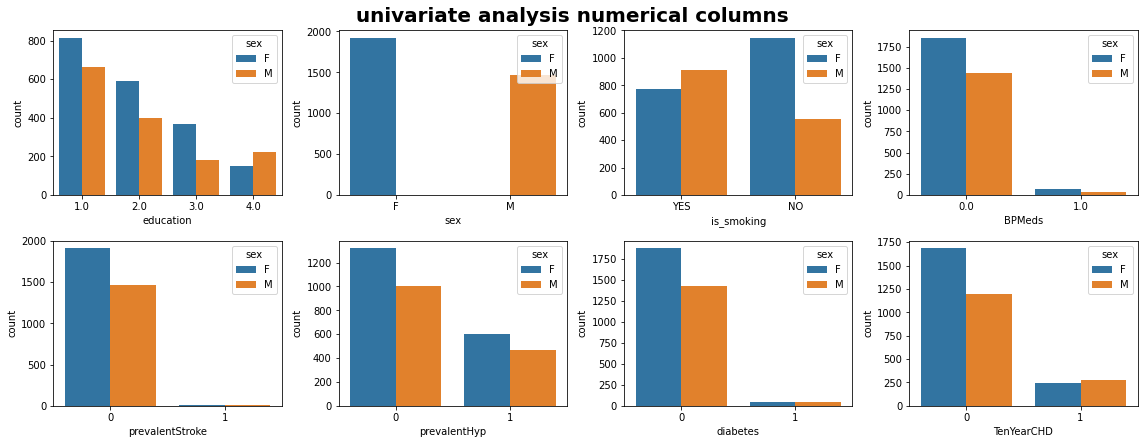

In [286]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

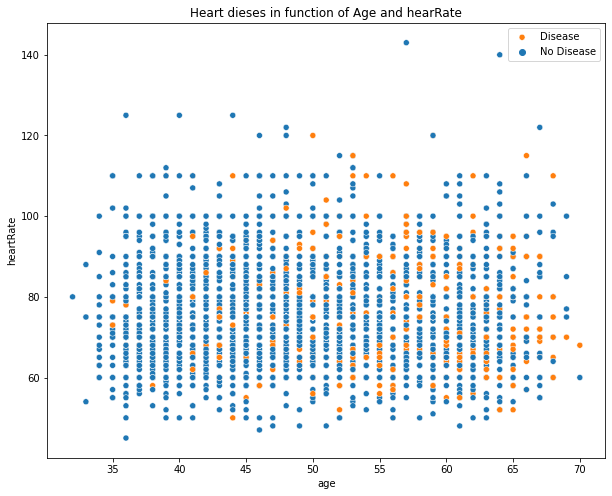

In [287]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)
plt.title('Heart dieses in function of Age and hearRate')
plt.legend(['Disease', 'No Disease'])

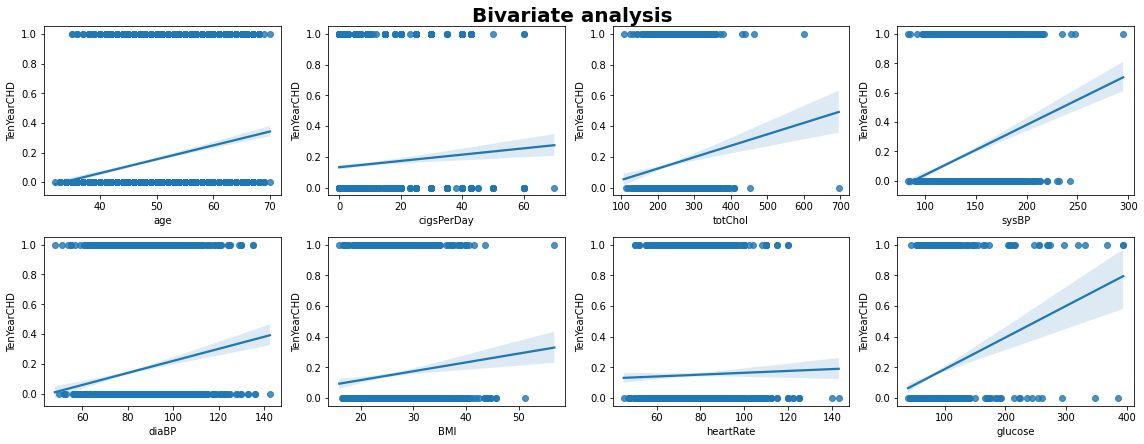

In [288]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.regplot(x=df[col], y='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

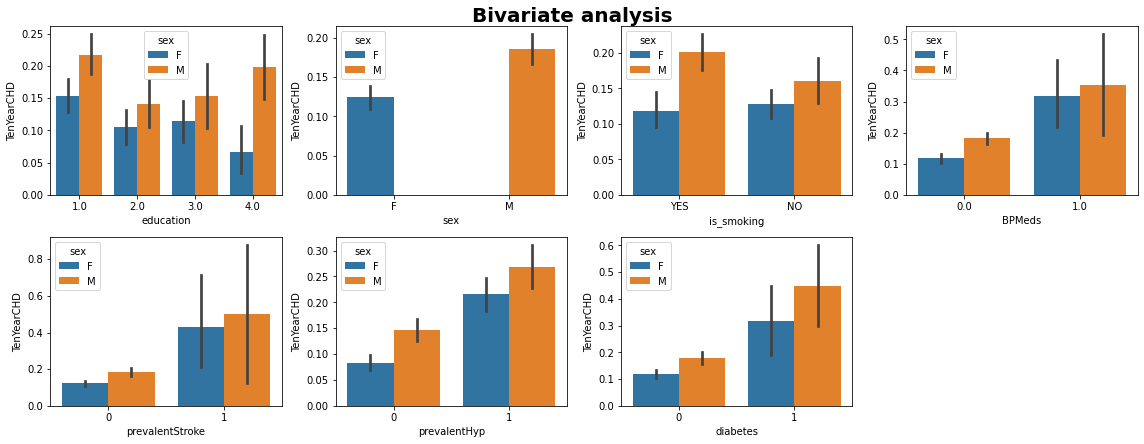

In [289]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features[:-1]):
  plt.subplot(2, 4, i+1)
  sns.barplot(x=df[col], y='TenYearCHD', hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

### **Correlation Heatmap**

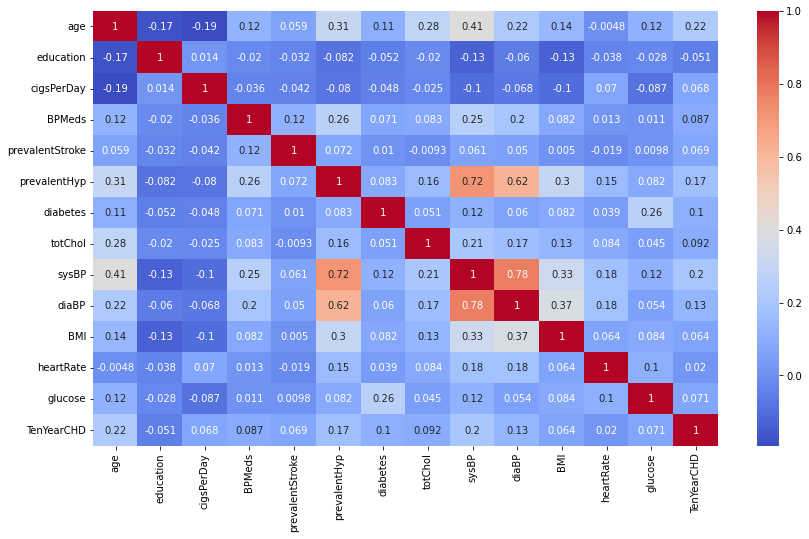

In [290]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

Blood pressure readings are given in two numbers.
* The top number of your blood pressure reading(systolic pressure).
* The bottom number of your blood pressure readings(diastolic pressure).

**The top number (systolic) minus the bottom number (diastolic) is the Pulse Pressure.** For example, if the resting blood pressure is 120/80 millimeters of mercury (mm Hg), the pulse pressure is 40 — which is considered a healthy pulse pressure. Generally, a pulse pressure greater than 40 mm Hg is unhealthy.

Measuring pulse pressure may help a health care provider predict the risk of a heart event, including a heart attack or stroke. A pulse pressure greater than 60 is considered a risk factor for cardiovascular disease, especially for older adults.

In [291]:

# adding new column PulsePressure 
df1['PulsePressure'] = df1['sysBP'] - df1['diaBP']

# dropping the sysBP and diaBP columns
df1.drop(columns=['sysBP', 'diaBP'], inplace=True)


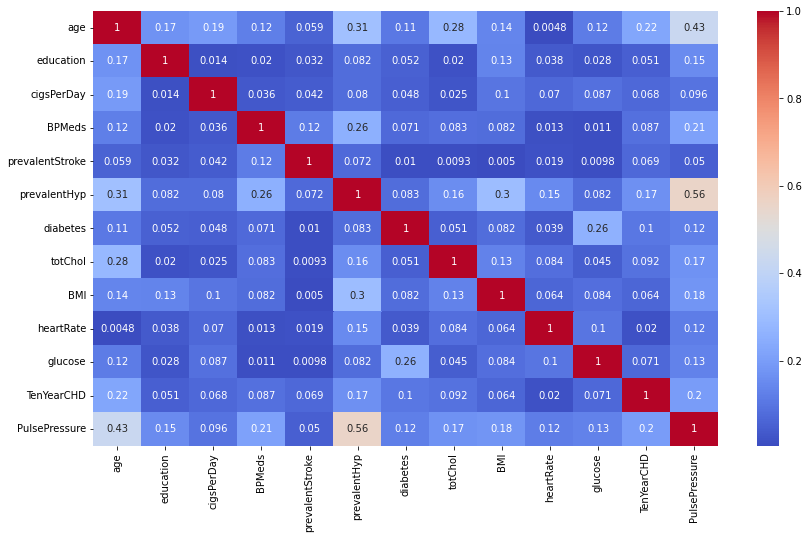

In [292]:
plt.figure(figsize=(14,8))
sns.heatmap(abs(df1.corr()), annot=True, cmap='coolwarm')

In [293]:
# checking data, weather the provide information is correct or not
df1[(df1.is_smoking == 'No') & (df1.cigsPerDay == 1)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,PulsePressure
id,,,,,,,,,,,,,,,


If people are Not Smoking and it shows in 'cigsPerDay' column is 1 or 5 or anything number, for that particular row we can say the provided information is false.
So, there is no false infomation available in the dataset.

### **Encoding**

In [294]:
df1['sex'] = df1['sex'].map({'M':1, 'F':0})
df1['is_smoking'] = df1['is_smoking'].map({'YES':1, 'NO':0})

### **Feature Selection**

In [295]:

X = df1.drop('TenYearCHD', axis=1)
y= df1['TenYearCHD']


In [296]:

'''information gain ---> Information gain calculates the reduction in entropy from the transformation of a dataset. 
It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.'''

from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)
mutual_data = pd.Series(mutual_info, index=X.columns)

mutual_data.sort_values(ascending=False)

age                0.023809
PulsePressure      0.021357
prevalentHyp       0.016348
prevalentStroke    0.011946
glucose            0.008786
BMI                0.008707
cigsPerDay         0.006374
diabetes           0.006100
totChol            0.004346
education          0.000000
sex                0.000000
is_smoking         0.000000
BPMeds             0.000000
heartRate          0.000000
dtype: float64

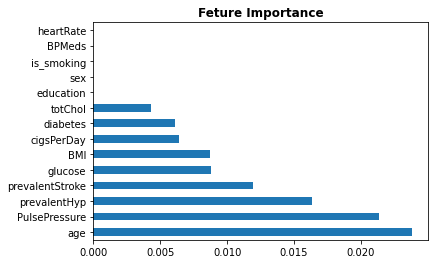

In [297]:
plt.title('Feture Importance', fontweight='bold')
mutual_data.sort_values(ascending=False).plot(kind='barh')
plt.show()

We are dealing with healthcare related data. So, every data is important to analysze or to make prediction on target variable, for that reason I am taking top 12 columns and remaining are dropped which are less contribute to evaluate inforamtion gain.

In [298]:
# selected independent features after feature selection
selected_feature = mutual_data.nlargest(12).index
df1[selected_feature]

,age,PulsePressure,prevalentHyp,prevalentStroke,glucose,BMI,cigsPerDay,diabetes,totChol,education,sex,is_smoking
id,,,,,,,,,,,,
0,64.0,63.00,0,0,80.0,25.38,3.0,0,221.0,2.0,0,1
1,36.0,70.00,1,0,75.0,29.77,0.0,0,212.0,4.0,1,0
2,46.0,45.00,0,0,94.0,20.35,10.0,0,250.0,1.0,0,1
3,50.0,70.00,1,0,94.0,28.26,20.0,0,233.0,1.0,1,1
4,64.0,51.50,0,0,77.0,26.42,30.0,0,241.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60.0,44.50,0,0,103.0,29.28,0.0,0,261.0,1.0,0,0
3386,46.0,46.00,0,0,84.0,21.96,0.0,0,199.0,1.0,0,0
3387,44.0,50.75,1,0,72.0,28.92,3.0,0,351.0,3.0,1,1


**Final feature that are provided to fit the model.**

In [299]:
# independent and dependent features

X = df1[selected_feature]
y = df1['TenYearCHD']


In [300]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, roc_auc_score, plot_confusion_matrix
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [301]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model

## **Model Building**

### **Train Test Split**

In [302]:

# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)


(2712, 12)
(678, 12)


### **Scaling Data**

In [303]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **Handling Imbalance Data**
Oversampling the train dataset using **SMOTETomek technique**

In [304]:

## Handling imbalance data using SMOTE techniques
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling {Counter(y_train)}')

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f'After Handling {Counter(y_train)}')


Before Handling Counter({0: 2304, 1: 408})
After Handling Counter({0: 2304, 1: 2304})


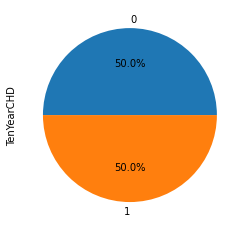

In [434]:
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [305]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,y_train)

In [306]:
y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)

# roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_curve(y_test, y_test_pred)

(array([0.        , 0.34434783, 1.        ]),
 array([0.        , 0.69902913, 1.        ]),
 array([2, 1, 0]))

In [307]:
#defining algorithm function
def algorithm(model_name):                             #creating the model function which will take model name as the input
  model_obj = model_name
  model_obj.fit(X_train,y_train)   # will fit on X_train and Y_train

  y_train_pred = model_obj.predict(X_train)  # predicting y_train_pred and y_test_pred
  y_test_pred  = model_obj.predict(X_test)

  y_train_prob = model_obj.predict_proba(X_train)    #predicting the probabilities of each class ...
  y_test_prob = model_obj.predict_proba(X_test)

  # evaluation metrics on test data
  train_accuracy =  accuracy_score(y_train, y_train_pred)
  train_recall = recall_score(y_train, y_train_pred)
  train_precision = precision_score(y_train, y_train_pred)

  return 

In [308]:
# # define metrics function
# def get_metrics(model,y_train,y_train_pred,y_test,y_test_pred): # take predected y values and model name as argument
  
  
#   train_metrics = (y_train, y_train_pred)
  
#   train_accuracy=accuracy_score(train_metrics) # calculate accuracy of train dataset
#   train_precision = precision_score(train_metrics) # calculate precision of train dataset
#   train_recall = recall_score(train_metrics) # calculate recall score of train dataset
#   train_f1 = f1_score(train_metrics) # calculate f1 score of train dataset
  
#   train_roc = roc_auc_score(y_train) # calculate roc auc score of train dataset

#   # print score for train data
#   print('**** Train Dataset Score ****')
#   print('train_accuracy {}'.format(train_accuracy)) 
#   print('train_precision is {}'.format(train_precision))
#   print('train_recall is {}'.format(train_recall))
#   print('train_f1 is {}'.format(train_f1))
#   print('train_roc is {}'.format(train_roc))
 
#   test_metrics = (y_test, y_test_pred)

#   test_accuracy=accuracy_score(test_metrics) # calculate accuracy of train dataset
#   test_precision = precision_score(test_metrics) # calculate precision of train dataset
#   test_recall = recall_score(test_metrics) # calculate recall score of train dataset
#   test_f1 = f1_score(test_metrics) # calculate f1 score of train dataset
#   test_roc = roc_auc_score(y_test, y_test_pred) # calculate roc auc score of train dataset

#   # print score for test data
#   print('\n**** Test Dataset Score ****')
#   print('test_accuracy is {}'.format(test_accuracy))
#   print('test_precision is {}'.format(test_precision))
#   print('test_recall is {}'.format(test_recall))
#   print('test_f1 is {}'.format(test_f1))
#   print('test_roc is {}'.format(test_roc))

#   # print confusion matrix
#   print('\n**** Confusion Matrix on train set ****')
#   cm = confusion_matrix(y_test, y_test_pred)
#   sns.heatmap(cm,annot = True, fmt = "d") # plot confusion matrix using heat map
#   plt.show()
  
#   # plot ROC-AUC curve
#   print('\n**** Plot ROC-AUC Curve ****')
#   fpr, tpr, _ = roc_curve(y_test, y_test_pred) # find fpr and tpr
#   plt.plot(fpr,tpr,label="data 1, auc="+str(test_roc))
#   plt.plot([0,1], [0,1], color='orange', linestyle='--')
#   plt.legend(loc=4)
#   plt.show()

In [309]:
# # Defining a function to train the input model and print evaluation matrix
# def analyse_model(model, X_train, X_test, y_train, y_test):

#   '''Takes classifer model and train test splits as input and prints the
#   evaluation matrices with the plot and returns the model'''

#   # Fitting the model
#   model.fit(X_train,y_train)

#   # Feature importances
#   try:
#     try:
#       importance = model.feature_importances_
#       feature = X_train.columns
#     except:
#       importance = np.abs(model.coef_[0])
#       feature = X.columns
#     indices = np.argsort(importance)
#     indices = indices[::-1]
#   except:
#     pass
  
#   # Plotting Evaluation Metrics for train and test dataset
#   for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):
#     # Getting required metrics
#     pred = model.predict(x)
#     pred_proba = model.predict_proba(x)[:,1]
#     report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
#     # report = classification_report(y_pred=pred, y_true=act)
#     fpr, tpr, thresholds = roc_curve(act, pred_proba)

#     # Classification report
#     # print(report)
#     plt.figure(figsize=(18,3))
#     plt.subplot(1,3,1)
#     sns.heatmap(report.iloc[:-1, :].T, annot=True, cmap='coolwarm')
#     plt.title(f'{label} Report')

#     # Confusion Matrix
#     plt.subplot(1,3,2)
#     sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
#     plt.title(f'{label} Confusion Matrix')
#     plt.xlabel('Predicted labels')
#     plt.ylabel('Actual labels')

#     # AUC_ROC Curve
#     plt.subplot(1,3,3)
#     plt.plot([0,1],[0,1],'k--')
#     plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
#     plt.legend(loc=4)
#     plt.title(f'{label} AUC_ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.tight_layout()

#     try:
#       plt.figure(figsize=(18,3))
#       plt.bar(range(len(indices)),importance[indices])
#       plt.xticks(range(len(indices)), [feature[i] for i in indices])
#       plt.title('Feature Importance')
#       plt.tight_layout()
#     except:
#       pass
#       plt.show()

#   print(f'predected percent of people with Cardiovascular Risk  : {(sum( pred)/ pred.size )*100}')

#   return model

In [310]:
# # Fitting Linear Regression Model
# lr = LogisticRegression(fit_intercept=True, max_iter=10000)
# analyse_model(lr,  X_train, X_test, y_train, y_test)

In [311]:
print(f'train data score : {lr.score(X_train, y_train)}')
print(f'test data score : {lr.score(X_test, y_test)}')

train data score : 0.6623263888888888
test data score : 0.6622418879056047


In [312]:
X.columns

Index(['age', 'PulsePressure', 'prevalentHyp', 'prevalentStroke', 'glucose',
       'BMI', 'cigsPerDay', 'diabetes', 'totChol', 'education', 'sex',
       'is_smoking'],
      dtype='object')

In [313]:
lr.coef_ 

array([[ 0.60043074,  0.21204328,  0.19336162,  0.08510042,  0.00837343,
        -0.01937235,  0.29608402,  0.1236903 ,  0.05746835, -0.07146235,
         0.08156214,  0.17972466]])

In [314]:
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [315]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [316]:
#evaluation function
def evaluation(Y,y,y_proba):    #creating evaluation function to get all the evaluation parameters in a single time..

  # print(f'Accuracy:\n{accuracy_score(Y, y)}')
  # print()
  # print(f'Confusion Matrix:\n{confusion_matrix(Y, y)}')
  print()
  print(f'Classification Report:\n{classification_report(Y, y)}')  #classification report for the model
  
  precision = precision_score(Y, y)   #Calculating precision
  recall = recall_score(Y, y)  #calculating recall
  f1Score = f1_score(Y,y)  # calculating f1score
  accuracy = accuracy_score(Y, y)  #calculating accuracy
  ROC_AUC_Score = roc_auc_score(Y,y_proba)  #calculating ROC_AUC_score.

  return precision,recall,f1Score,accuracy,ROC_AUC_Score   #returning the parameters

In [418]:

model_result = []

def predict(ml_model, X,y):
  
  #train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
  
  #standrdization
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # handling imbalance data
  X_train, y_train = SMOTE().fit_resample(X_train, y_train)

  # model fitting
  global model1
  model1 = ml_model
  model = model1.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]

  
  ''' Performance Metrics''' 
  global train_accuracy, test_accuracy, train_recall, test_recall, train_precision, test_precision

  # accuracy score
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {train_accuracy}')
  print(f'test accuracy : {test_accuracy}')
  print('\n')

  # recall score
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {train_recall}')
  print(f'test recall : {test_recall}')
  print()

  # precision score
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {train_precision}')
  print(f'test precision : {test_precision}')
  print('\n')

  # roc_auc score
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {train_roc_auc}')
  print(f'test roc_auc : {test_roc_auc}')
  print('\n')

  print(classification_report(y_train, y_train_pred))
  print('-'*50)
  print(classification_report(y_test, y_test_pred))

  # train_precision = precision_score(y_train, y_train_pred)
  # train_roc_auc = roc_auc_score(y_train, y_train_prob)
  # classification_report(y_train, y_train_pred)
  # print(f'test accuracy : {train_accuracy}')
  # print(f'test accuracy : {test_recall}')
  # print(f'test accuracy : {test_precision}')
  # print(f'test roc_auc : {test_roc_auc}')
  # print('-'*100)
  # #confusion_matrix(y_train, y_train_pred)

  '''roc curve on test data'''
  fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
  auc = roc_auc_score(y_test, y_test_pred)
  plt.plot(fpr,tpr,label=" auc="+str(auc))
  x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
  plt.plot(x,y,'b--',color='b')
  plt.legend()
  plt.title ('roc curve')
  plt.show()

model_result.append({'model_name': model1,
              'train_accuracy':train_accuracy, 
              'test_accuracy':test_accuracy,
              'train_recall':train_recall,
              'test_recall':test_recall,
              'train_precision':train_precision,
              'test_precision':test_precision})

NameError: ignored

train accuracy : 0.6673177083333334
test accuracy : 0.6533923303834809


train recall : 0.66796875
test recall : 0.6699029126213593

train precision : 0.6671001300390117
test precision : 0.25555555555555554


train roc_auc : 0.7289191351996528
test roc_auc : 0.7454453355846349


              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2304
           1       0.67      0.67      0.67      2304

    accuracy                           0.67      4608
   macro avg       0.67      0.67      0.67      4608
weighted avg       0.67      0.67      0.67      4608

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       575
           1       0.26      0.67      0.37       103

    accuracy                           0.65       678
   macro avg       0.59      0.66      0.57       678
weighted avg       0.82      0.65      0.70       678



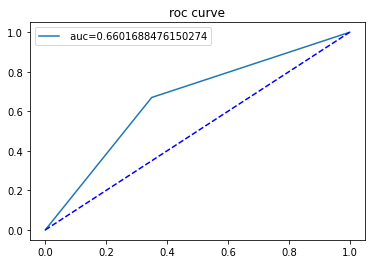

In [419]:
predict(LogisticRegression(), X,y)

In [421]:
pd.DataFrame(model_result)

""


In [ ]:

# actual vs predicted value on test data
d = {'y_actual':y_test, 'y_predict':y_test_pred}
print(pd.DataFrame(data=d).head().T)

In [230]:

# Making predictions on train and test data
train_class_preds = xgb.predict(X_train)
test_class_preds = xgb.predict(X_test)

# Get the probabilities on train and test
train_preds = xgb.predict_proba(X_train)[:,1]
test_preds = xgb.predict_proba(X_test)[:,1]


In [231]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

print(train_auc)
print(test_auc)

0.9908066959422658
0.6221359223300971


In [232]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy1 = accuracy_score(test_class_preds,y_test)
test_accuracy2 = accuracy_score(y_test, test_class_preds)


print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy1)
print("The accuracy on test data is ", test_accuracy2)

The accuracy on train data is  0.9553834808259587
The accuracy on test data is  0.8067846607669616
The accuracy on test data is  0.8067846607669616


In [233]:
test_class_preds = lr.predict(X_test)
print(confusion_matrix(y_test, test_class_preds))

print('accuracy score:',accuracy_score(y_test, test_class_preds))

print(classification_report(y_test, test_class_preds))

# roc_curve(y_test, test_class_preds)
# actual vs predicted value on test data
d = {'y_actual':y_test, 'y_predict':test_class_preds}
pd.DataFrame(data=d).head().T

[[574   1]
 [ 97   6]]
accuracy score: 0.855457227138643
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       575
           1       0.86      0.06      0.11       103

    accuracy                           0.86       678
   macro avg       0.86      0.53      0.52       678
weighted avg       0.86      0.86      0.80       678



id,995,376,1739,1472,477
y_actual,0,0,0,0,0
y_predict,0,0,0,0,0


[[571   4]
 [ 94   9]]
0.855457227138643
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       575
           1       0.69      0.09      0.16       103

    accuracy                           0.86       678
   macro avg       0.78      0.54      0.54       678
weighted avg       0.83      0.86      0.80       678

id         995   376   1739  1472  477 
y_actual      0     0     0     0     0
y_predict     0     0     0     0     0


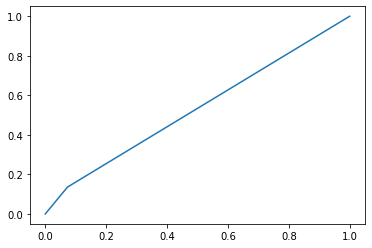

In [234]:
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train, y_train)

test_class_preds = xgb.predict(X_test)
print(confusion_matrix(y_test, test_class_preds))
print(accuracy_score(y_test, test_class_preds))
print(classification_report(y_test, test_class_preds))

d = {'y_actual':y_test, 'y_predict':test_class_preds}
pd.DataFrame(data=d).sample(5).T

plt.plot(false_positive_rate, true_positive_rate, label='XGBClassifier')
# actual vs predicted value on test data
d = {'y_actual':y_test, 'y_predict':test_class_preds}
print(pd.DataFrame(data=d).head().T)

[[492  83]
 [ 65  38]]
0.7817109144542773
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       575
           1       0.31      0.37      0.34       103

    accuracy                           0.78       678
   macro avg       0.60      0.61      0.60       678
weighted avg       0.80      0.78      0.79       678



id,995,376,1739,1472,477
y_actual,0,0,0,0,0
y_predict,0,0,0,0,0


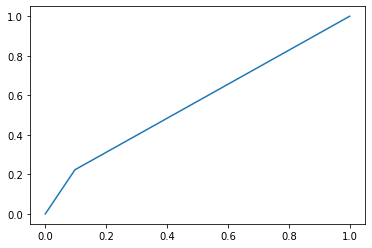

In [101]:
from sklearn.ensemble import RandomForestClassifier

xgb = RandomForestClassifier(n_estimators=100, min_samples_leaf=7, min_samples_split=5, random_state=33).fit(X_train, y_train)

test_class_preds = xgb.predict(X_test)
print(confusion_matrix(y_test, test_class_preds))
print(accuracy_score(y_test, test_class_preds))
print(classification_report(y_test, test_class_preds))

plt.plot(false_positive_rate, true_positive_rate)
d = {'y_actual':y_test, 'y_predict':test_class_preds}
pd.DataFrame(data=d).head().T

In [100]:
# from sklearn.ensemble import RandomForestClassifier
# predict(RandomForestClassifier(n_estimators=100, min_samples_leaf=7, min_samples_split=5, random_state=33),X,y)

0.8067846607669616
0.13592233009708737
[[533  42]
 [ 89  14]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       575
           1       0.25      0.14      0.18       103

    accuracy                           0.81       678
   macro avg       0.55      0.53      0.53       678
weighted avg       0.76      0.81      0.78       678

0.5314394259181089


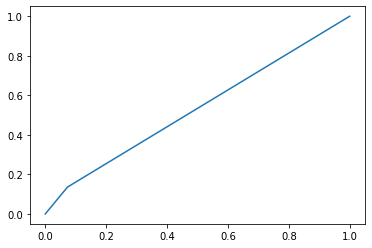

In [219]:
xgb=XGBClassifier(learning_rate=.9)
xgb.fit(X_train,y_train)
print(accuracy_score(y_test,xgb.predict(X_test)))
print(recall_score(y_test,xgb.predict(X_test)))
print(confusion_matrix(y_test,xgb.predict(X_test)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, xgb.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(classification_report(y_test,xgb.predict(X_test)))
print(roc_auc)
plt.plot(false_positive_rate, true_positive_rate, label='XGBClassifier')